# Pair Programming Correlación y covarianza

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación? 

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

4. Guardad la gráfica del heatmap.

In [12]:
import numpy as np
import pandas as pd
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('../datos/diamonds_1.csv', index_col=0)
df.head(3)

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31


## 1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación? 


En la covarianza ambas variables varian en la misma dirección, donde decimos que una covarianza es positiva cuando al aumentar el valor de una variable aumenta el de la otra, y de lo contrario hablaríamos de una covarianza negativa, donde al aumentar el valor de una variable disminuye el de la otra.

En la correlación de igual manera se verifica si dos variables estan relacionadas siendo la dirección de estas, positiva o negativa al igual que en la covarianza, y además se mide la fuerza de esa relación. 

Por lo que la diferencia de estos dos estadisticos, es que en la correlación se mide la fuerza de la relación variando de -1 a 1 entre las variables y en la covarianza, no. 

## 2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [14]:
#Hallamos la covarianza de las variables
df.cov()

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
carat,0.208519,0.005740,0.179481,1.102873e+03,0.490684,0.486868,0.302336
depth,0.005740,1.487510,-0.707651,2.422409e+00,-0.042008,-0.044053,0.061601
table,0.179481,-0.707651,4.633227,8.076733e+02,0.469676,0.454033,0.233636
price,1102.872598,2.422409,807.673299,9.633308e+06,2731.455100,2714.723729,1679.949354
lenght_mm,0.490684,-0.042008,0.469676,2.731455e+03,1.250840,1.240010,0.764561
width_mm,0.486868,-0.044053,0.454033,2.714724e+03,1.240010,1.233085,0.758807
depth_mm,0.302336,0.061601,0.233636,1.679949e+03,0.764561,0.758807,0.476571



La matriz de covarianzas muestra los valores de covarianza, que miden la relación lineal de cada par de elementos o variables. Los valores de covarianza positivos indican que valores por encima del promedio de una variable están asociados con valores por encima del promedio de la otra variable y que valores por debajo del promedio de una variable están asociados con valores por debajo del promedio de la otra variable.

#### *Sobre las covarianzas:*   

- Los valores por encima de la media de la variable de precio están fuertemente asociados con los valores por encima de la media de los carats. Es decir, los precios disparatados (valores extremos) nos llevan a también valores extremos en los carats.

- La 'table' o, la parte del diamante que se ve desde arriba y responsable de reflejar correctamente la luz (brillar), no varía apenas con el precio. Es decir, a mayores variaciones de dicha parte, muy pocas variaciones tendrán lugar en el precio. En resumen: el brillo del diamante no incide en su precio.


In [15]:
#Hallamos la correlación de las variables
df.corr()

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
carat,1.000000,0.010306,0.182602,0.778154,0.960791,0.960158,0.959078
depth,0.010306,1.000000,-0.269555,0.000640,-0.030796,-0.032528,0.073164
table,0.182602,-0.269555,1.000000,0.120894,0.195099,0.189954,0.157230
price,0.778154,0.000640,0.120894,1.000000,0.786875,0.787665,0.784052
lenght_mm,0.960791,-0.030796,0.195099,0.786875,1.000000,0.998453,0.990257
width_mm,0.960158,-0.032528,0.189954,0.787665,0.998453,1.000000,0.989854
depth_mm,0.959078,0.073164,0.157230,0.784052,0.990257,0.989854,1.000000


#### *Sobre las correlaciones*:


A simple vista, vemos las siguientes relaciones:  

- La tendencia es que, a mayor carat, mayor la anchura (0.96), longitud (0.96) y profundidad (0.95) del diamante.

- Existe una relación muy significativa (0.78) entre precio y carats. Ahora sí, podemos confirmar que los diamantes con mayor carats son los más caros.

- También serán más caros aquellos que sean más largos (0.79), más profundos (0.78) y más anchos (0.79).

- No existe ninguna relación entre el table, y por ende el brillo, del diamante con cada una de las variables. Es decir, el brillo del diamante no depende ni de su precio (0.12), ni de los carats (0.18), ni del tamaño.


#### Visualizamos las relación entre todas las variables:

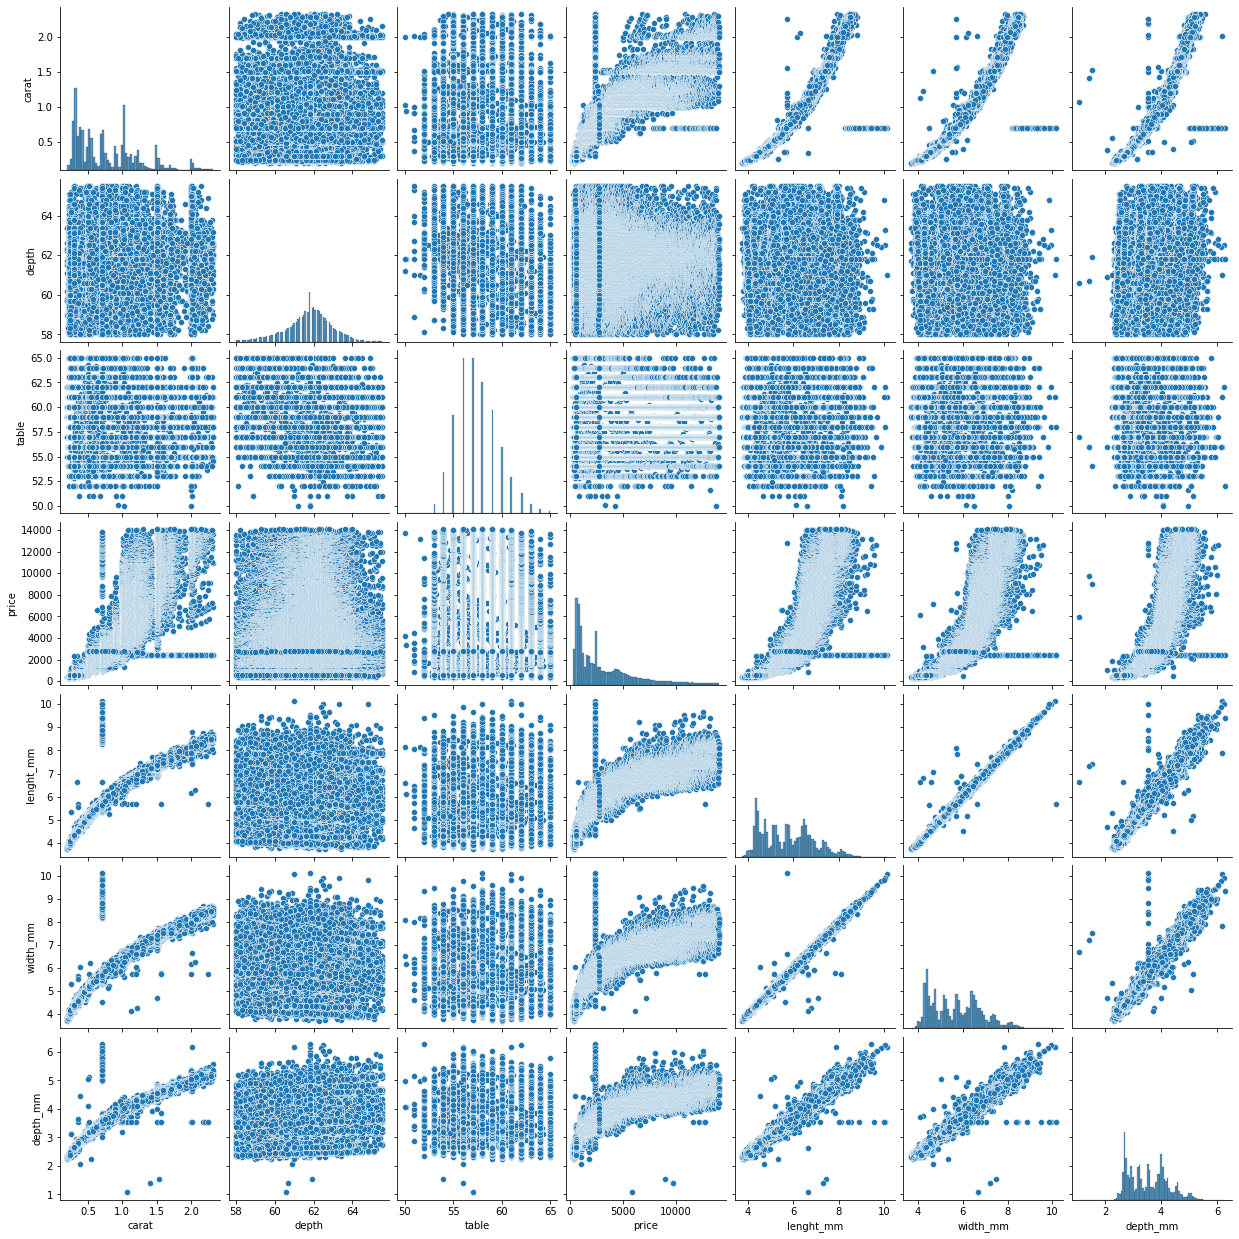

In [16]:
sns.pairplot(df);

La anchura y el largo del diamante tienen una relación casi perfecta. Parece que esta relación, aunque también bastante clara, no existe con la misma intensidad cuando cruzamos la profundidad del diamante con su ancho o largo.

Con relación al número de carats y las características del tamaño del diamante (profundidad, anchura y largo), se observa una relación no lineal, cuya tendencia tiende a ser una relación directa: a mayor número de carats, mayores serán la profundidad y la largura. Sin embargo, parece que a medida que aumentan los carats, esta profundidad y largura se estancan.

En el ejercicio, se solicita utilizar la correlación de Pearson. Sin embargo, **dada la relación no-lineal señalada anteriormente, utilizaremos Spearman** para comprobar la correlación entre el número de carats y el tamaño:

In [17]:
df.corr(method='spearman')

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
carat,1.000000,0.024248,0.191866,0.916074,0.989447,0.988833,0.987521
depth,0.024248,1.000000,-0.225608,0.016077,-0.023645,-0.025067,0.092185
table,0.191866,-0.225608,1.000000,0.162636,0.199686,0.193713,0.158954
price,0.916074,0.016077,0.162636,1.000000,0.913675,0.913011,0.908813
lenght_mm,0.989447,-0.023645,0.199686,0.913675,1.000000,0.997941,0.988129
width_mm,0.988833,-0.025067,0.193713,0.913011,0.997941,1.000000,0.987861
depth_mm,0.987521,0.092185,0.158954,0.908813,0.988129,0.987861,1.000000


Observamos que se afianza la relación entre carats y precio (de 0.79 en Pearson a 0.91 con Spearman). Las variables de tamaño del diamante aumentan todavía más alcanzando valores igual de altos (0.98) en las tres dimensiones.

## 3. Creamos un heatmap:

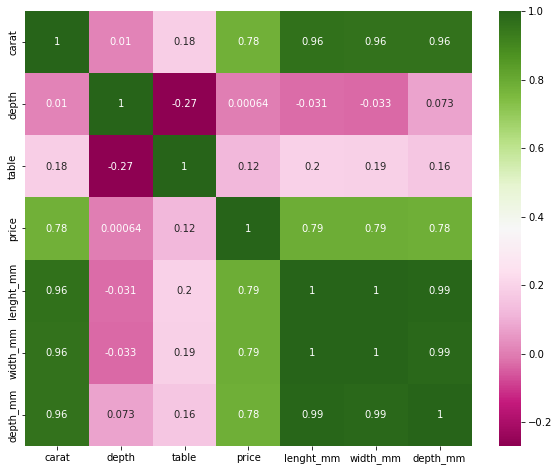

In [18]:
sns.heatmap(df.corr(), 
           cmap = "PiYG", 
           annot = True);

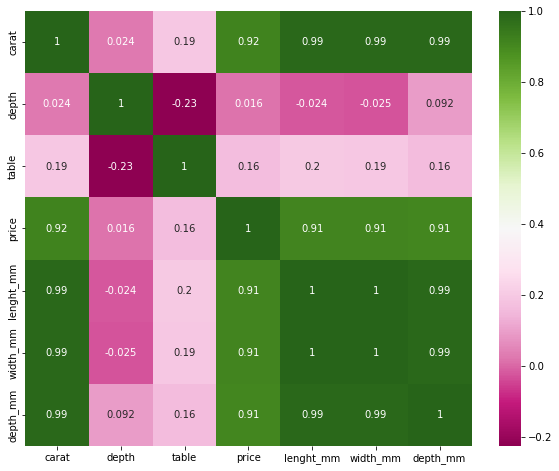

In [19]:
sns.heatmap(df.corr(method='spearman'), 
           cmap = "PiYG", 
           annot = True);

## 4. Guardamos el gráfico.

In [20]:
plt.savefig('heatmap-corr-ej3-spearman.png');

<Figure size 720x576 with 0 Axes>